In [1]:
pip install pybiomart

   ---------------------------------------- 0.0/491.3 kB ? eta -:--:--
   -- ------------------------------------- 30.7/491.3 kB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 153.6/491.3 kB 1.5 MB/s eta 0:00:01
   ----------------------- ---------------- 286.7/491.3 kB 2.0 MB/s eta 0:00:01
   -------------------------------------- - 471.0/491.3 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 491.3/491.3 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/61.4 kB ? eta -:--:--
   ---------------------------------------- 61.4/61.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
   ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install py4cytoscape

   ---------------------------------------- 0.0/180.5 kB ? eta -:--:--
   -------- ------------------------------ 41.0/180.5 kB 653.6 kB/s eta 0:00:01
   ------------------------------- -------- 143.4/180.5 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 180.5/180.5 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   -- ------------------------------------- 0.1/2.0 MB 3.6 MB/s eta 0:00:01
   ----- ---------------------------------- 0.3/2.0 MB 3.2 MB/s eta 0:00:01
   ------- -------------------------------- 0.4/2.0 MB 3.0 MB/s eta 0:00:01
   ---------- ----------------------------- 0.5/2.0 MB 2.9 MB/s eta 0:00:01
   ------------ --------------------------- 0.6/2.0 MB 2.8 MB/s eta 0:00:01
   --------------- ------------------------ 0.8/2.0 MB 2.7 MB/s eta 0:00:01
   ------------------ --------------------- 0.9/2.0 MB 2.6 MB/s eta 0:00:01
   ------------------ --------------------- 0.9/2.0 MB 2.6 MB/s eta 0:00:01
   ---------

In [7]:
import json
import os
import sys
from sklearn.datasets import load_iris
import pandas as pd
from pybiomart import Dataset
from pybiomart import Server
import py4cytoscape as pc
import requests
import re
import time
import networkx as nx

In [11]:
#check the available datasets in marts and their respective attributes and filters
server = Server(host='http://www.ensembl.org')
Marts=server.list_marts()
print(Marts)
#df1 = pd.DataFrame(Marts)
#df1.to_csv('marts.csv', index=False)

mart = server.marts['ENSEMBL_MART_SNP'] 
datas = mart.list_datasets()
print(datas)
#df2 = pd.DataFrame(datas)
#df2.to_csv('datasets.csv', index=False)
set = mart.datasets['hsapiens_snp']  # fetching the lists of attributes and filters from hspaiens_snp dataset

attributes = set.list_attributes()
filters = set.list_filters()
#df3 = pd.DataFrame(attributes)
#df3.to_csv('att.csv', index=False)

#df4 = pd.DataFrame(filters)
#df4.to_csv('filter.csv', index=False)

# Output the first few attributes and filters
print(attributes.head())
print(filters.head())

                    name            display_name
0   ENSEMBL_MART_ENSEMBL       Ensembl Genes 112
1     ENSEMBL_MART_MOUSE       Mouse strains 112
2  ENSEMBL_MART_SEQUENCE                Sequence
3  ENSEMBL_MART_ONTOLOGY                Ontology
4   ENSEMBL_MART_GENOMIC    Genomic features 112
5       ENSEMBL_MART_SNP   Ensembl Variation 112
6   ENSEMBL_MART_FUNCGEN  Ensembl Regulation 112
                       name                                       display_name
0            mdomestica_snp  Opossum Short Variants (SNPs and indels exclud...
1              hsapiens_snp  Human Short Variants (SNPs and indels excludin...
2               sscrofa_snp  Pig Short Variants (SNPs and indels excluding ...
3           scerevisiae_snp  Saccharomyces cerevisiae Short Variants (SNPs ...
4       mmusculus_structvar                 Mouse Structural Variants (GRCm39)
5          oaries_structvar       Sheep (texel) Structural Variants (Oar_v3.1)
6                oaries_snp  Sheep (texel) Short Varian

In [13]:
#open and read txt file containing variants list
with open("C:/Users/HP/Downloads/variant_list.txt", 'r') as file:
    # Read the contents of the file into a variable
    variants = file.read().splitlines() 
dataset = Dataset(name='hsapiens_snp',
                  host='http://www.ensembl.org')
#applying attributes and filters to query our desired dataset of variants associated with genes 
result=dataset.query(attributes=['ensembl_gene_name','refsnp_id'],
              filters={"snp_filter": variants},)
df = pd.DataFrame(result)
#df = df.loc[:,~df.columns.duplicated()] (in case of duplicates)
# Display the DataFrame
print(df)
#download the output in a csv file
output_path = "C:/Users/HP/Downloads/genetic_variants.csv"
df.to_csv(output_path, index=False)

          Gene Name Variant name
0   ENSG00000120885   rs11136000
1   ENSG00000176165  rs139237860
2   ENSG00000176165  rs141088742
3   ENSG00000176165  rs143223844
4   ENSG00000176165  rs147154860
5   ENSG00000176165  rs148157138
6   ENSG00000176165  rs150277632
7   ENSG00000130204     rs157580
8   ENSG00000130204    rs2075650
9   ENSG00000169057   rs28935168
10  ENSG00000176165  rs368707795
11  ENSG00000176165  rs369673538
12  ENSG00000176165  rs372915038
13  ENSG00000176165  rs374673901
14  ENSG00000176165  rs375378714
15  ENSG00000064687    rs4147929
16  ENSG00000171759    rs5030849
17  ENSG00000171759    rs5030856
18  ENSG00000171759    rs5030858
19  ENSG00000169057   rs61748411
20  ENSG00000169057   rs61751443
21  ENSG00000169057   rs61751449
22  ENSG00000171759   rs62508646
23  ENSG00000142192   rs63750264
24  ENSG00000203710    rs6656401
25  ENSG00000203710    rs6701713
26  ENSG00000198087    rs9349407


In [15]:
#Generate network of SNP associated to genes using cytoscape's Python API py4cytoscape
import py4cytoscape as pc
dir(pc)

['ARROW_STYLE_PROPERTIES',
 'CATCHUP_FILTER_SECS',
 'CATCHUP_NETWORK_MERGE_SECS',
 'CATCHUP_NETWORK_SECS',
 'CATCHUP_NETWORK_TIMEOUT_SECS',
 'COLOR_PROPERTIES',
 'CUSTOM_GRAPHICS_PROPERTIES',
 'Color',
 'CyError',
 'DEFAULT_BASE_URL',
 'DIMENSION_PROPERTIES',
 'EDGE_ARROW_STYLE_PROPERTIES',
 'EDGE_COLOR_PROPERTIES',
 'EDGE_DIMENSION_PROPERTIES',
 'EDGE_FONT_FACE_PROPERTIES',
 'EDGE_LABEL_PROPERTIES',
 'EDGE_LINE_STYLE_PROPERTIES',
 'EDGE_OPACITY_PROPERTIES',
 'EDGE_TOOLTIP_PROPERTIES',
 'EDGE_VISIBLE_PROPERTIES',
 'ExecutionEnvironment',
 'FONT_FACE_PROPERTIES',
 'LABEL_PROPERTIES',
 'LINE_STYLE_PROPERTIES',
 'LOCAL_BASE_URL',
 'MODEL_PROPAGATION_SECS',
 'NETWORK_COLOR_PROPERTIES',
 'NODE_COLOR_PROPERTIES',
 'NODE_CUSTOM_GRAPHICS_POSITION_PROPERTIES',
 'NODE_CUSTOM_GRAPHICS_PROPERTIES',
 'NODE_DIMENSION_PROPERTIES',
 'NODE_FONT_FACE_PROPERTIES',
 'NODE_LABEL_PROPERTIES',
 'NODE_OPACITY_PROPERTIES',
 'NODE_SHAPE_PROPERTIES',
 'NODE_TOOLTIP_PROPERTIES',
 'NODE_VISIBLE_PROPERTIES',
 'OPAC

In [17]:
# Connect to Cytoscape
pc.cytoscape_ping()

You are connected to Cytoscape!


'You are connected to Cytoscape!'

In [19]:
#checking if cytoscape is connected
pc.cytoscape_version_info()

{'apiVersion': 'v1',
 'cytoscapeVersion': '3.10.2',
 'automationAPIVersion': '1.9.0',
 'py4cytoscapeVersion': '1.9.0'}

In [27]:
#importing the already generated csv file containing variants associated to genes into cytoscape
snp_gene_data=pd.read_csv("C:/Users/HP/Downloads/genetic_variants.csv")
#checking the first five lines of our dataframe
snp_gene_data.head()

,Gene Name,Variant name
0,ENSG00000120885,rs11136000
1,ENSG00000176165,rs139237860
2,ENSG00000176165,rs141088742
3,ENSG00000176165,rs143223844
4,ENSG00000176165,rs147154860


In [31]:
#creating a dict named edge data with two keys source and target and the values of these keys are from the columns of the dataset apms
edge_data = {'source':snp_gene_data["Variant name"],
             'target':snp_gene_data["Gene Name"], }
edges = pd.DataFrame(data=edge_data, columns=['source', 'target'])
edges.head()

,source,target
0,rs11136000,ENSG00000120885
1,rs139237860,ENSG00000176165
2,rs141088742,ENSG00000176165
3,rs143223844,ENSG00000176165
4,rs147154860,ENSG00000176165


In [33]:
#Creating the network of SNPs associated to genes
pc.create_network_from_data_frames(edges=edges, title='snp-gene network', collection="network collection")

Applying default style...
Applying preferred layout


398

In [37]:
#Exporting the generated Network in desired file format
# List all networks to find the correct SUID
networks = pc.get_network_list()
#print the list of available networks on cytoscape
print(networks)

[]


In [113]:
pc.get_network_suid()

1376

In [45]:
pc.get_network_list()

[]

In [79]:
pc.get_network_list(get_suids=True)

[]

In [49]:
# Putting the position of desired network after checking it from the list
network_suid = 398
#Download the network
pc.export_network(filename='C:/Users/HP/Downloads/gene_variants.cx', type='CX', network=network_suid)

{'file': 'C:\\Users\\HP\\Downloads\\gene_variants.cx'}

In [51]:
pc.export_image('C:/Users/HP/Downloads/snp-gene', type='png')

{'file': 'C:\\Users\\HP\\Downloads\\snp-gene.png'}

In [53]:
pc.layout_network()

{}

In [55]:
#Extending the snp-gene network to snp-gene-pathway network
pc.import_network_from_file('C:/Users/HP/Downloads/gene_variants.cx')
pc.commands_run('cytargetlinker extend network="current" direction=SOURCES linkSetFiles="C:/Users/HP/Downloads/linksets/wikipathways_hsa_20240410.xgmml"')

['Extension step: 1',
 'Linkset: WikiPathways-20240410_Homo sapiens_20240410',
 'Added edges: 47',
 'Added nodes: 36']

In [63]:
styles = pc.get_visual_style_names()
print(styles)

['Solid', 'snp-gene network_1-Style', 'Nested Network Style', 'BioPAX_SIF', 'default black', 'Minimal', 'default', 'Directed', 'Universe', 'size_rank', 'Big Labels', 'Ripple', 'Sample3', 'Sample1', 'Curved', 'Gradient1', 'Marquee', 'BioPAX', 'Sample2']


In [85]:
#change the style of the network
pc.set_visual_style('Sample2')

{'message': 'Visual Style applied.'}

In [67]:
pc.get_layout_names()

['attribute-grid',
 'degree-circle',
 'attributes-layout',
 'kamada-kawai',
 'force-directed',
 'cose',
 'hierarchical',
 'attribute-circle',
 'stacked-node-layout',
 'circular',
 'grid',
 'fruchterman-rheingold',
 'isom',
 'force-directed-cl']

In [69]:
pc.get_layout_name_mapping()

{'Attribute Grid Layout': 'attribute-grid',
 'Degree Sorted Circle Layout': 'degree-circle',
 'Group Attributes Layout': 'attributes-layout',
 'Edge-weighted Spring Embedded Layout': 'kamada-kawai',
 'Prefuse Force Directed Layout': 'force-directed',
 'Compound Spring Embedder (CoSE)': 'cose',
 'Hierarchical Layout': 'hierarchical',
 'Attribute Circle Layout': 'attribute-circle',
 'Stacked Node Layout': 'stacked-node-layout',
 'Circular Layout': 'circular',
 'Grid Layout': 'grid',
 'Edge-weighted Force directed (BioLayout)': 'fruchterman-rheingold',
 'Inverted Self-Organizing Map Layout': 'isom',
 'Prefuse Force Directed OpenCL Layout': 'force-directed-cl'}

In [73]:
pc.layout_network('kamada-kawai')

{}

In [101]:
pc.export_image('C:/Users/HP/Downloads/snp-gene-pathway', type='png')

{'file': 'C:\\Users\\HP\\Downloads\\snp-gene-pathway.png'}

In [107]:
pc.set_node_font_size_default(35, style_name= 'default')

''

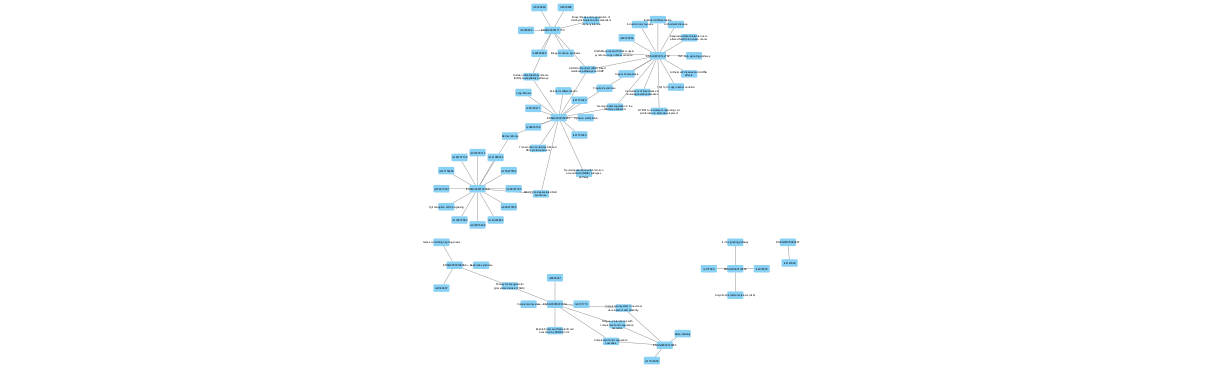

In [103]:
pc.notebook_export_show_image()